# **matplotlib**
---

### **matplotlib API入门**

> **matplotlib的示例库和文档是学习高级特性的最好资源。  笔记：虽然本书没有详细地讨论matplotlib的各种功能，但足以将你引入门。**

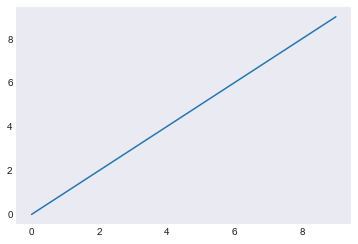

In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')
import numpy as np
data = np.arange(10)
plt.plot(data);

> **创建Figure(画布)和Subplot（子画布）**  

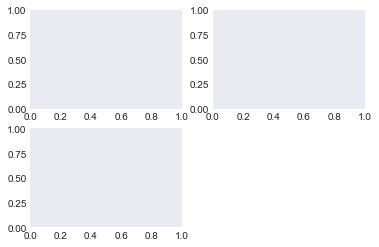

In [2]:
# matplotlib的图像都位于Figure对象中。
# 你可以用plt.figure创建一个新的Figure：
fig = plt.figure() 
ax1 = fig.add_subplot(2,2,1) # 子画布2x2排列，从第一个画布开始绘图
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

> **Jupyter notebook有一点不同，即每个小窗重新执行后，图形会被重置。对于复杂的图形，，你必须将所有的绘图命令存在一个小窗里.**

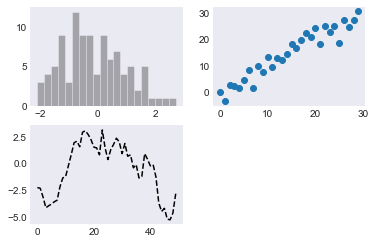

In [3]:
fig = plt.figure() # 创建绘图类的对象
ax1 = fig.add_subplot(2, 2, 1) # 用面向对象方法创建绘图子窗格
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
# 绘图是从后开始
# 也就是说matplotlib就会在最后一个用过的subplot（如果没有则创建一个）上进行绘制，
# 隐藏创建figure和subplot的过程

plt.plot(np.random.randn(50).cumsum(), 'k--')
# "k--"是一个线型选项，用于告诉matplotlib绘制黑色虚线图

ax1.hist(np.random.randn(100),bins=20,color='k',alpha=0.3)
# hist条形图

ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
# scatter散点图

> **plt.subplots方法快速创建新Figure**

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

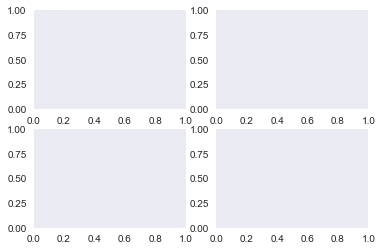

In [5]:
fig,axes = plt.subplots(2,2)
axes

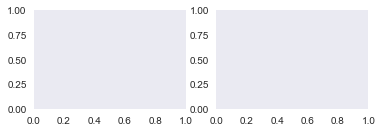

In [6]:
# 从画布添加子图
fig = plt.figure()
#ax = plt.subplot()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

> **plt.subplots()参数**  

| 参数 | 说明 |
| ---- | ---- |
| nrows | subplot的行数 |
| nclos | subplot的列数 |
| sharex | x轴刻度 |
| sharey | y轴刻度 |
| subplot_kw | 创建图表的字典 |
| **fig_kw** | 其他关键词 |

> **df.subplot_adjust()调整subplot周围的间距**

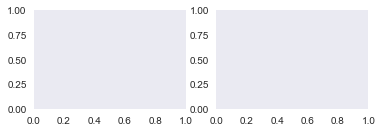

In [7]:
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)
fig

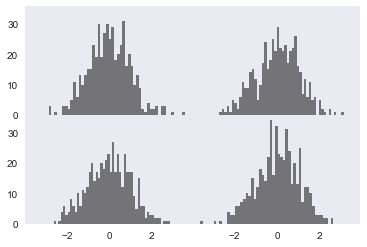

In [8]:
import numpy as np
import matplotlib.pyplot as plt
fig,axes = plt.subplots(2,2,sharex=True,sharey=True) # 设置2行2列的图表
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500),bins=50,color='k', alpha=0.5)
        # 使用i,j维度=>[1，1],[1,2],[2,1],[2,2]分别绘制条形图
plt.subplots_adjust(wspace=0,hspace=0)

> **设置颜色、标记和线型**

In [4]:
ax.plot(x, y, linestyle='--', color='g')

NameError: name 'ax' is not defined

刻度、标签和图例

In [ ]:
ax.get_xlim
ax.set_xlim

<bound method _AxesBase.set_xlim of <AxesSubplot:>>

设置标题、轴标签、刻度以及刻度标签

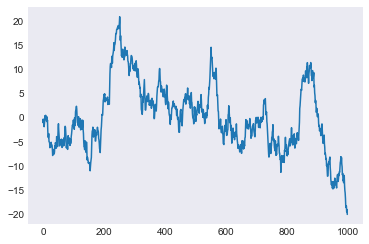

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum());

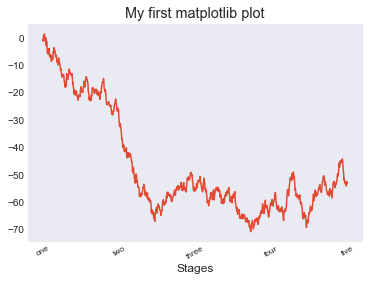

In [ ]:
ax = plt.axes()
ax.plot(np.random.randn(1000).cumsum());

ticks = ax.set_xticks([0, 250, 500, 750, 1000]) # X 轴刻度

# 设置X轴标签
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                              rotation=30, fontsize='small')

ax.set_title('My first matplotlib plot') # 设置标题

ax.set_xlabel('Stages'); # 设置X轴标题

添加图例

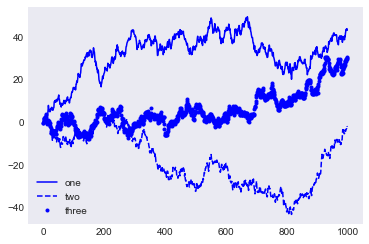

In [ ]:
from numpy.random import randn

fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)

ax.plot(randn(1000).cumsum(), 'b', label='one')

ax.plot(randn(1000).cumsum(), 'b--', label='two')

ax.plot(randn(1000).cumsum(), 'b.', label='three')

ax.legend(loc='best')

注解以及在Subplot上绘图

In [ ]:
ax.text(x, y, 'Hello world!',
        family='monospace', fontsize=10)


Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

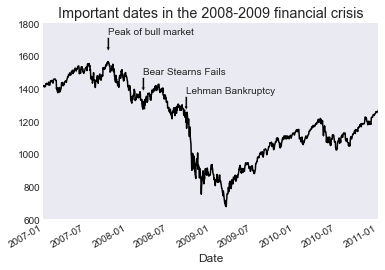

In [ ]:
import pandas as pd
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

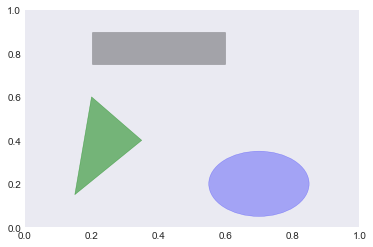

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

matplotlib配置

In [ ]:
plt.rc('figure', figsize=(10, 10))

In [ ]:
font_options = {'family' : 'monospace',
                'weight' : 'bold',
                'size'   : 'small'}
plt.rc('font', 'font_options')

### **使用pandas和seaborn绘图**
---

线型图

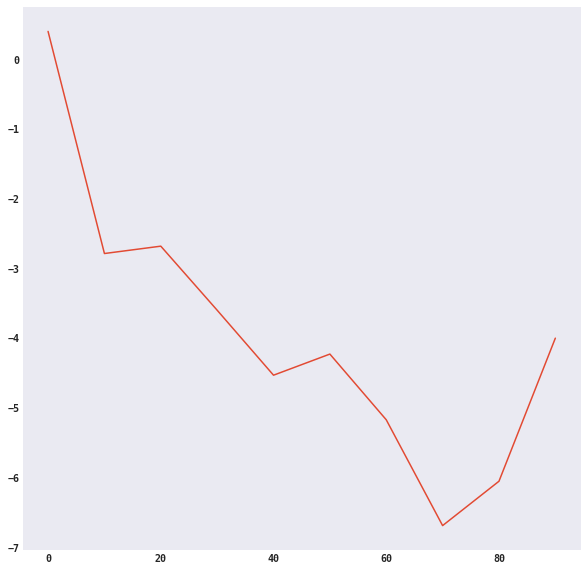

In [ ]:
# 序列
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot();

![](img/subplot%E5%8F%82%E6%95%B0%E3%80%81.png)

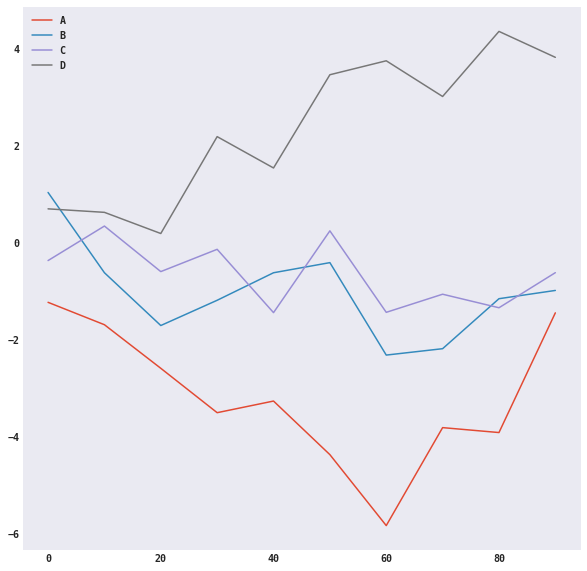

In [ ]:
# dataframe
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))

df.plot();

柱状图

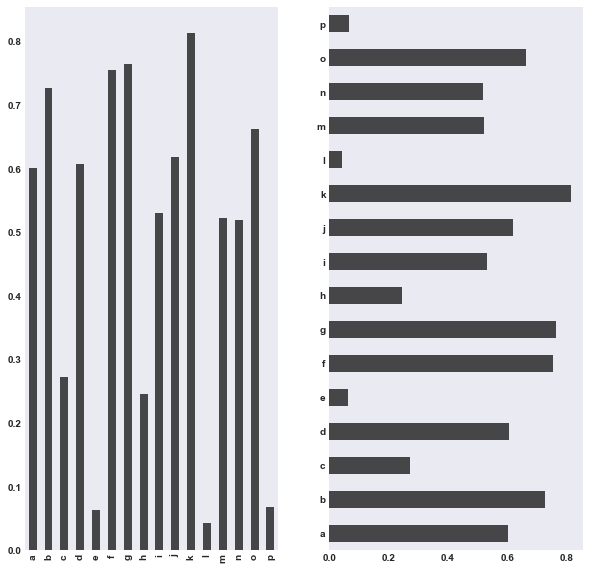

In [ ]:
# series
fig, axes = plt.subplots(1, 2)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7);

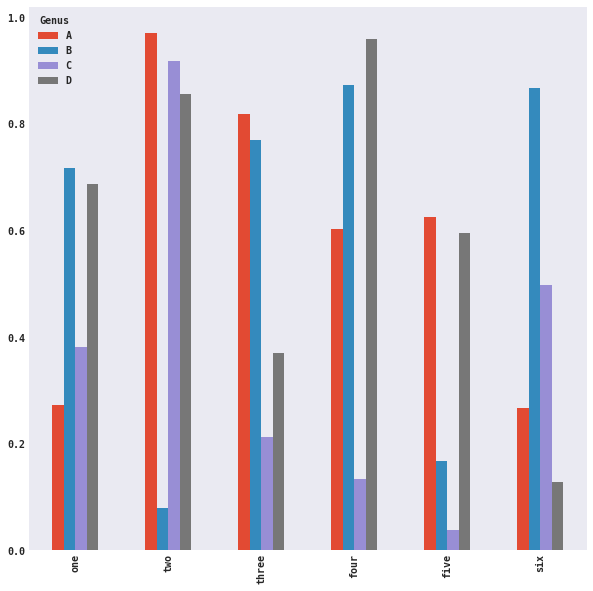

In [ ]:
# dataframe
df = pd.DataFrame(np.random.rand(6, 4),
                   index=['one', 'two', 'three', 'four', 'five', 'six'],
                     columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

df.plot.bar();

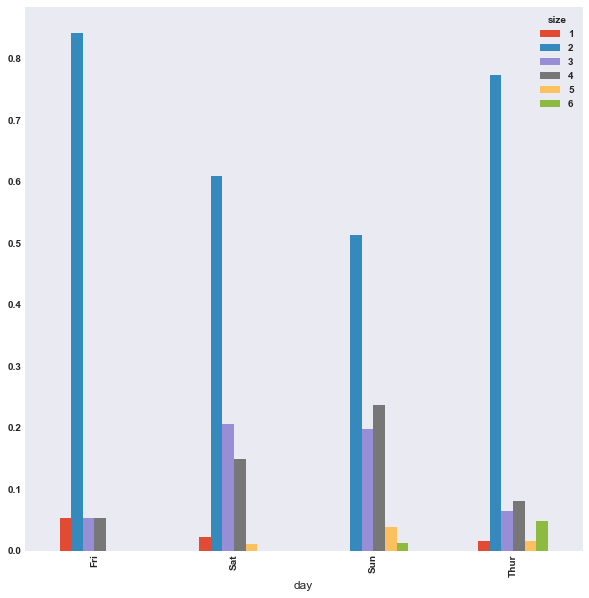

In [ ]:
tips = pd.read_csv('examples/tips.csv')

party_counts = pd.crosstab(tips['day'], tips['size'])

party_counts = pd.crosstab(tips['day'], tips['size'])

party_pcts = party_counts.div(party_counts.sum(1), axis=0)

party_pcts.plot.bar();


使用seaborn可以减少工作量。

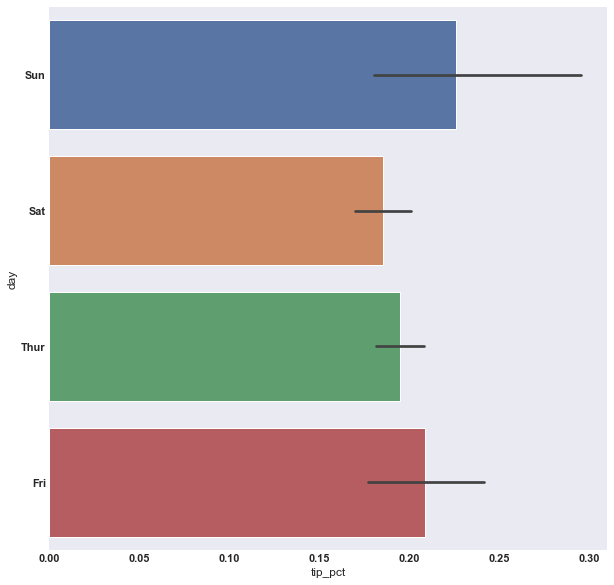

In [ ]:
'''
于是，通过该数据集就可以看出，聚会规模在周末会变大。
对于在绘制一个图形之前，需要进行合计的数据，
使用seaborn可以减少工作量。
用seaborn来看每天的小费比例（图9-19是结果）：
'''
import seaborn as sns

plt.style.use('seaborn-dark')

tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

sns.barplot(x='tip_pct', y='day', data=tips, orient='h');

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

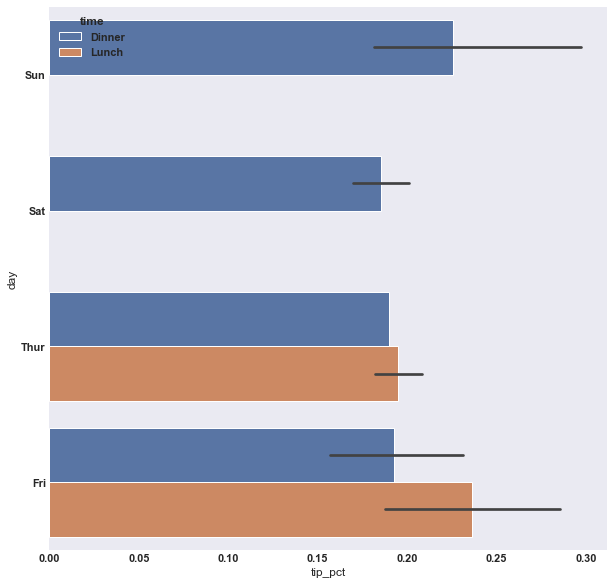

In [ ]:
'''
seaborn的绘制函数使用data参数，它可能是pandas的DataFrame。
其它的参数是关于列的名字。因为一天的每个值有多次观察，柱状图的值是tip_pct的平均值。
绘制在柱状图上的黑线代表95%置信区间（可以通过可选参数配置）。

seaborn.barplot有颜色选项，使我们能够通过一个额外的值设置（见图9-20）：
'''

sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

直方图和密度图

<AxesSubplot:ylabel='Frequency'>

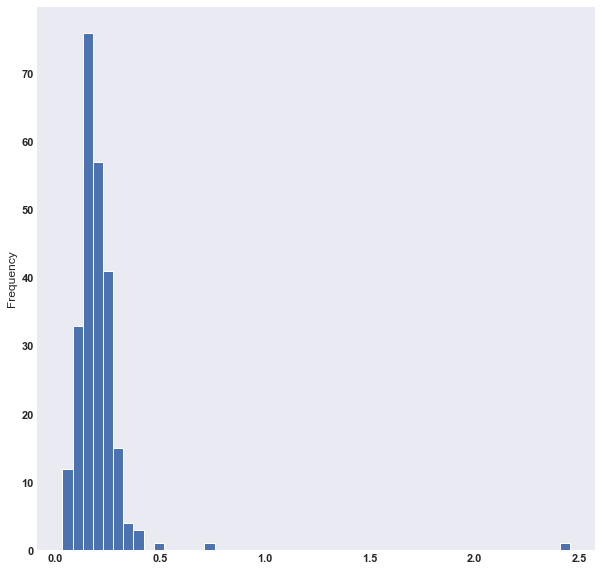

In [ ]:
tips['tip_pct'].plot.hist(bins=50)

>与此相关的一种图表类型是密度图，它是通过计算“可能会产生观测数据的连续概率分布的估计”而产生的。一般的过程是将该分布近似为一组核（即诸如正态分布之类的较为简单的分布）。因此，密度图也被称作KDE（Kernel Density Estimate，核密度估计）图。使用plot.kde和标准混合正态分布估计即可生成一张密度图（见图9-22）：

<AxesSubplot:ylabel='Density'>

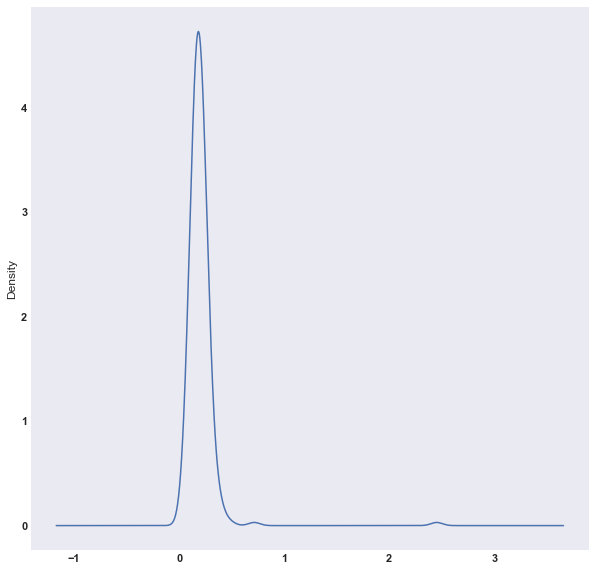

In [ ]:
tips['tip_pct'].plot.density()

C:\Users\mjl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


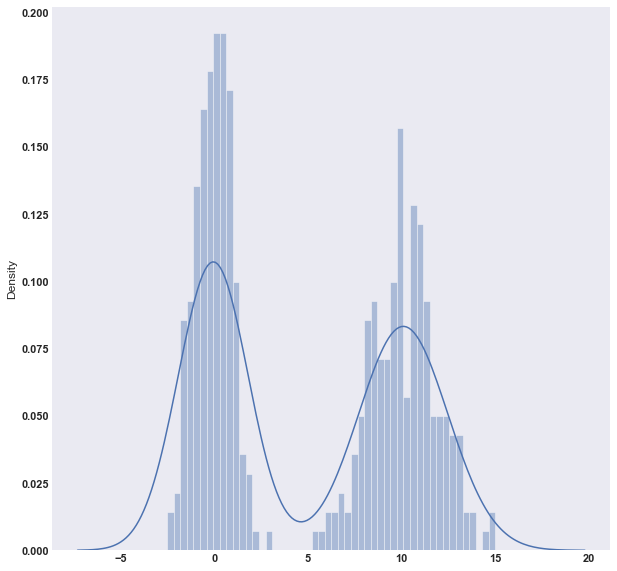

In [ ]:
'''
seaborn的distplot方法绘制直方图和密度图更加简单，
还可以同时画出直方图和连续密度估计图。作为例子，
考虑一个双峰分布，
由两个不同的标准正态分布组成（见图9-23）：
'''
comp1 = np.random.normal(0, 1, size=200)

comp2 = np.random.normal(10, 2, size=200)

values = pd.Series(np.concatenate([comp1, comp2]))

sns.distplot(values, bins=50, color='b');


散布图或点图

C:\Users\mjl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

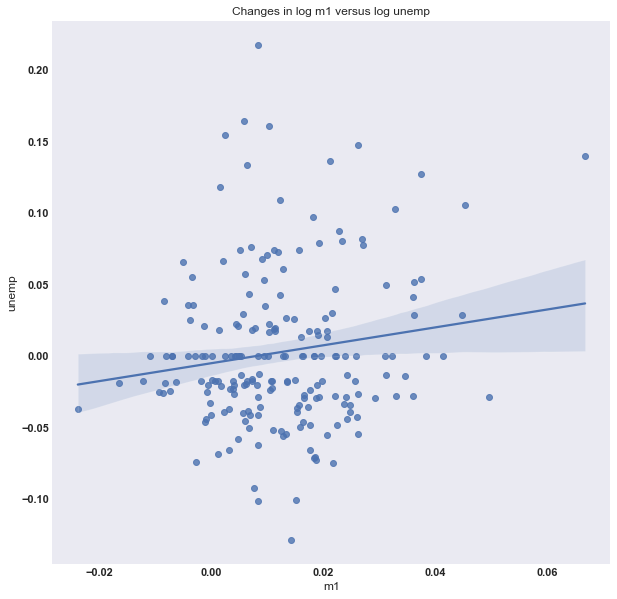

In [ ]:
macro = pd.read_csv('examples/macrodata.csv')

data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

trans_data = np.log(data).diff().dropna()

sns.regplot('m1', 'unemp', data=trans_data)

plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

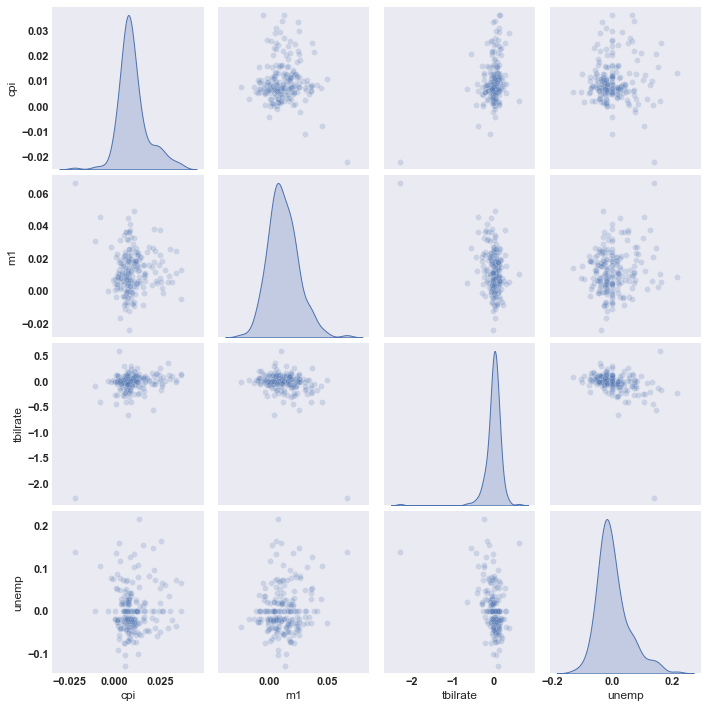

In [ ]:
'''
在探索式数据分析工作中，
同时观察一组变量的散布图是很有意义的，
这也被称为散布图矩阵（scatter plot matrix）。
纯手工创建这样的图表很费工夫，所以seaborn提供了一个便捷的pairplot函数，
它支持在对角线上放置每个变量的直方图或密度估计（见图9-25）：
'''

sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

分面网格（facet grid）和类型数据 要是数据集有额外的分组维度呢？有多个分类变量的数据可视化的一种方法是使用小面网格。seaborn有一个有用的内置函数factorplot，可以简化制作多种分面图（见图9-26）：

C:\Users\mjl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


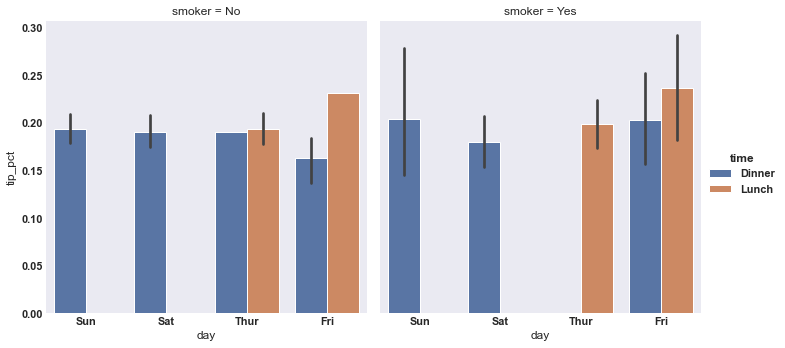

In [ ]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

C:\Users\mjl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


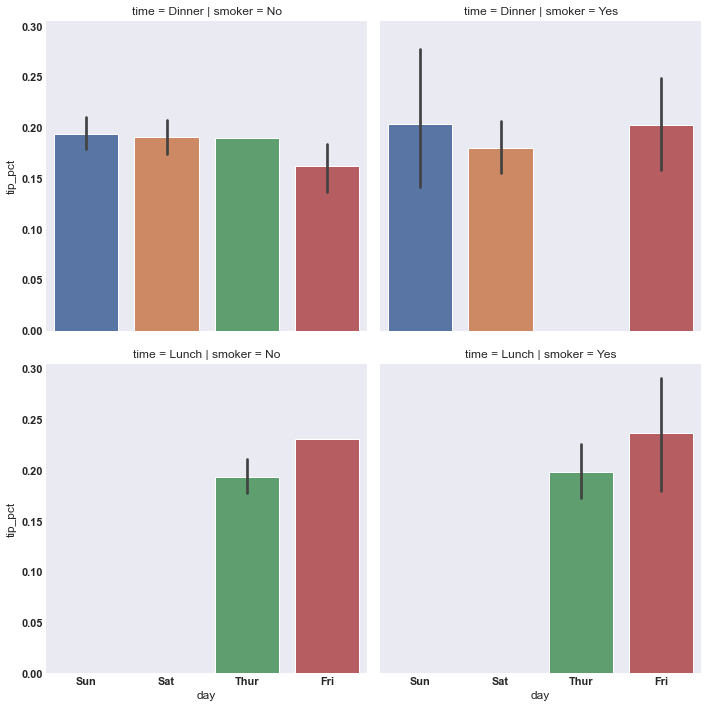

In [ ]:
sns.factorplot(x='day', y='tip_pct', row='time',
                 col='smoker',
                 kind='bar', data=tips[tips.tip_pct < 1])

C:\Users\mjl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


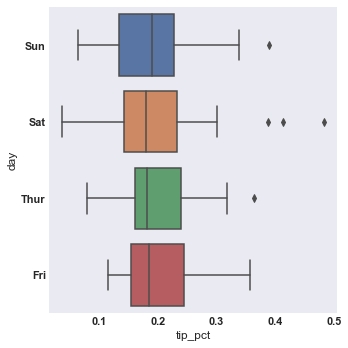

In [ ]:
sns.factorplot(x='tip_pct', y='day', kind='box',
                 data=tips[tips.tip_pct < 0.5])

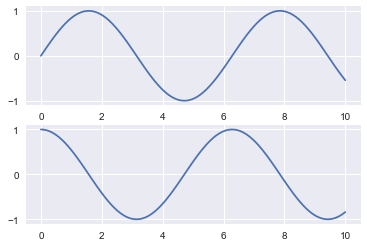

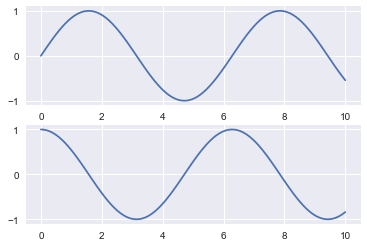

In [ ]:
# 介绍matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import numpy as np
x = np.linspace(0, 10, 100)
plt.figure()  # 创建图表

# 创建上面第一行的子图表，并设置x，y轴的数据
plt.subplot(2, 1, 1) # (行、列、子图表序号)
plt.plot(x, np.sin(x))

# 创建下面第二行的子图表，并设置x，y轴的数据
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));
# 首先创建两个子图表
# 返回值fig是两个子Figure对象，ax是两个子Axes对象
fig, ax = plt.subplots(2)

# 在两个不同的Axes对象上调用plot方法分别作图
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));


# 简单折线图

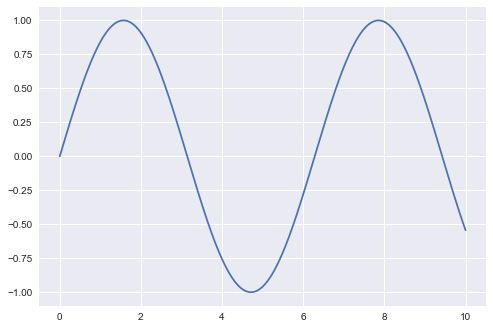

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import numpy as np

fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));


设置颜色、线形

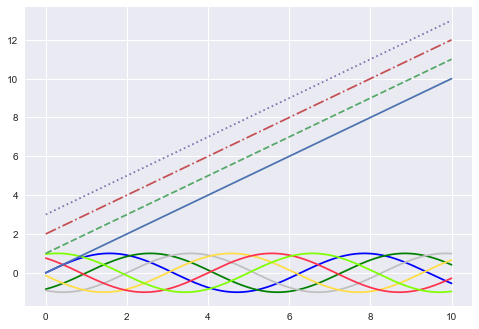

In [11]:
plt.plot(x, np.sin(x - 0), color='blue')        # 通过颜色名称指定
plt.plot(x, np.sin(x - 1), color='g')           # 通过颜色简写名称指定(rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # 介于0-1之间的灰阶值
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # 16进制的RRGGBB值
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB元组的颜色值，每个值介于0-1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # 能支持所有HTML颜色名称值
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

还可以用形象的符号代表线条风格

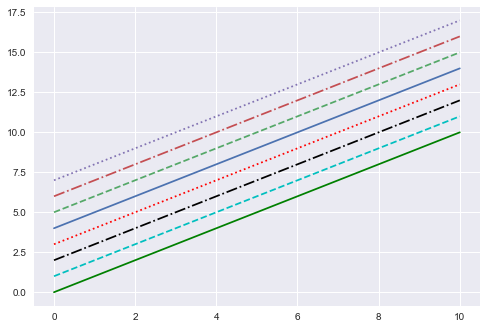

In [12]:
plt.plot(x, x + 4, linestyle='-')  # 实线
plt.plot(x, x + 5, linestyle='--') # 虚线
plt.plot(x, x + 6, linestyle='-.') # 长短点虚线
plt.plot(x, x + 7, linestyle=':');  # 点线
plt.plot(x, x + 0, '-g')  # 绿色实线
plt.plot(x, x + 1, '--c') # 天青色虚线
plt.plot(x, x + 2, '-.k') # 黑色长短点虚线
plt.plot(x, x + 3, ':r');  # 红色点线


调整坐标轴范围

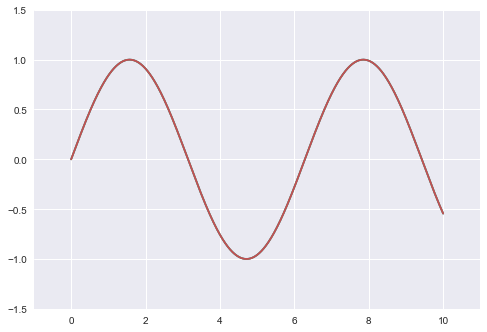

In [15]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);
plt.plot(x, np.sin(x))

plt.xlim(10, 0)
plt.ylim(1.2, -1.2);
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);


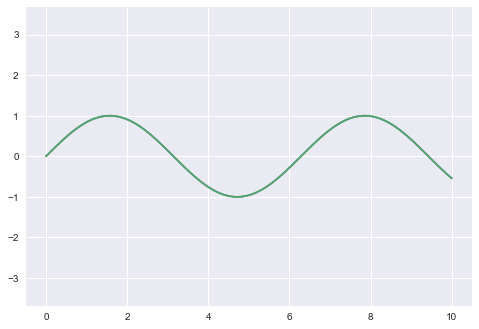

In [14]:
#[xmin, xmax, ymin, ymax]
plt.plot(x, np.sin(x))
plt.axis('tight');# 自适应
plt.plot(x, np.sin(x))
plt.axis('equal'); # 相同单位的长度

折线图标签
虽然大多数的`plt`函数都可以直接转换为`ax`的方法进行调用（例如`plt.plot()` → `ax.plot()`，`plt.legend()` → `ax.legend()`等），但是并不是所有的命令都能应用这种情况。特别是用于设置极值、标签和标题的函数都有一定的改变。下表列出了将MATLAB风格的函数转换为面向对象的方法的区别：

- ``plt.xlabel()``  → ``ax.set_xlabel()``
- ``plt.ylabel()`` → ``ax.set_ylabel()``
- ``plt.xlim()``  → ``ax.set_xlim()``
- ``plt.ylim()`` → ``ax.set_ylim()``
- ``plt.title()`` → ``ax.set_title()``

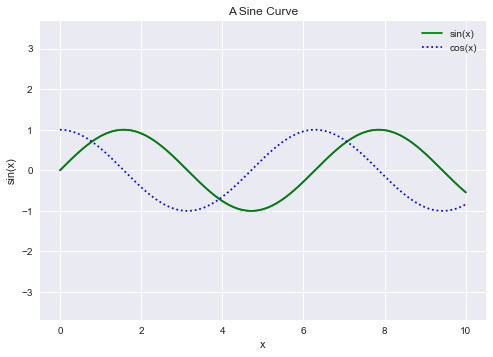

In [16]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve") # 标题
plt.xlabel("x")             # X轴标题
plt.ylabel("sin(x)");       # Y轴标题
plt.plot(x, np.sin(x), '-g', label='sin(x)') # 线标签
plt.plot(x, np.cos(x), ':b', label='cos(x)') # 线标签
plt.axis('equal')

plt.legend(); # 显示图例

一次性设置属性

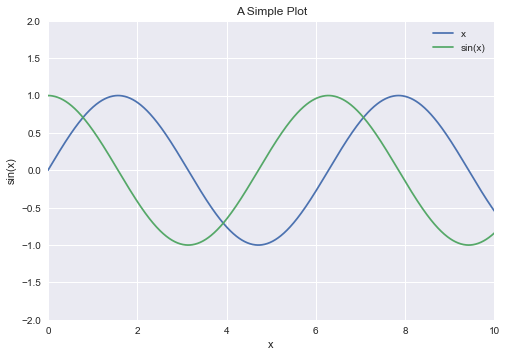

In [17]:
# 从坐标系创建图
ax = plt.axes()
ax.plot(x, np.sin(x),label='x')
ax.plot(x, np.cos(x),label='sin(x)')
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='sin(x)',
       title='A Simple Plot')
ax.legend();

# 从画布添加子图

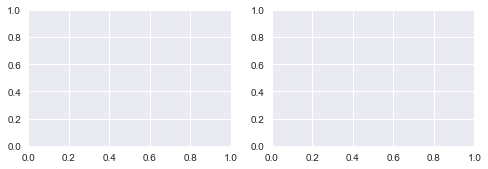

In [26]:
fig = plt.figure()
#ax = plt.subplot()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

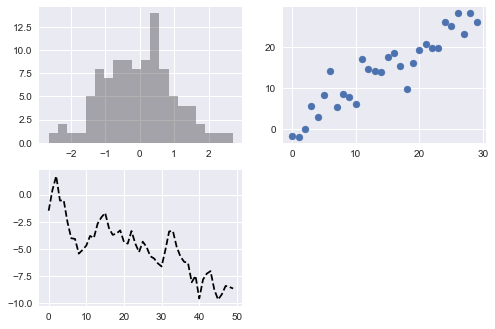

In [27]:

fig = plt.figure() # 创建绘图类的对象
ax1 = fig.add_subplot(2, 2, 1) # 用面向对象方法创建绘图子窗格
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
# 绘图是从后开始
# 也就是说matplotlib就会在最后一个用过的subplot（如果没有则创建一个）上进行绘制，
# 隐藏创建figure和subplot的过程
plt.plot(np.random.randn(50).cumsum(), 'k--')
ax1.hist(np.random.randn(100),bins=20,color='k',alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
# "k--"是一个线型选项，用于告诉matplotlib绘制黑色虚线图

# scatter散点图

# 从plt模块创建子图


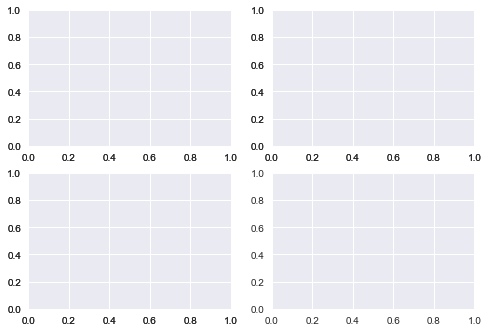

In [28]:
fig,axes = plt.subplots(2,2)
ax1 = fig.add_subplot(2,2,1) # 子画布2x2排列，从第一个画布开始绘图
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

# 直接创建子图

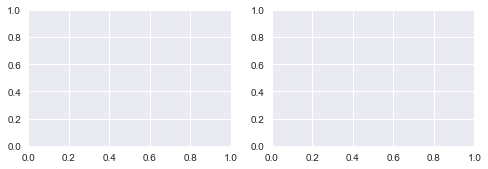

In [29]:
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)


# 简单散点图
使用plt.plot绘制散点图

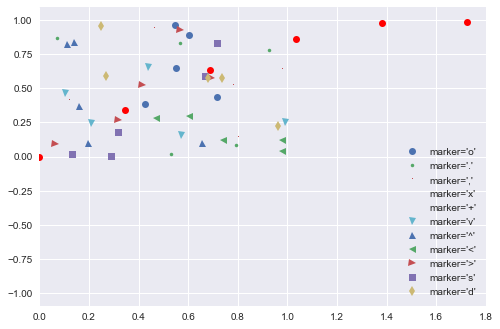

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import numpy as np
x = np.linspace(0,10,30)
y = np.sin(x)
ax = plt.axes()
ax.plot(x, y, 'o', color='r');
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

使用plt.scatter绘制散点图

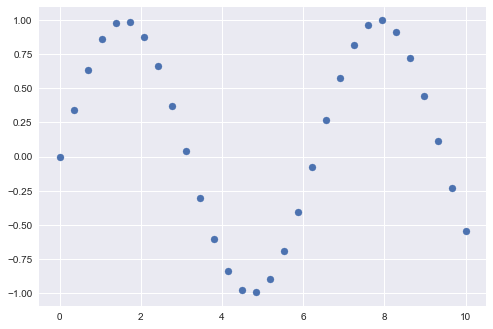

In [33]:
x = np.linspace(0,10,30)
y = np.sin(x)
ax = plt.axes()
ax.scatter(x, y, marker='o'); # 加个分号表示结束
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100) # 控制颜色
sizes = 1000 * rng.rand(100) # 控制大小



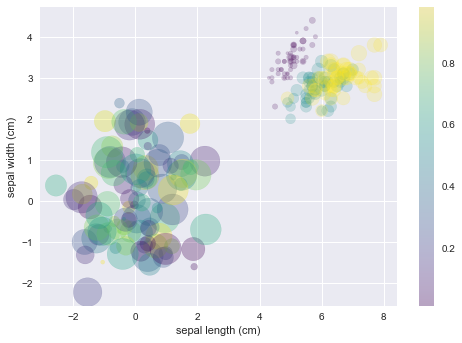

In [32]:
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # 显示颜色对比条

from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);